In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

mpl.rcParams["figure.figsize"] = 6, 4
mpl.rcParams["font.size"] = 12

In [14]:
ddict = {}

for hem in ["north", "south"]:
    ds = xr.open_dataset("nsidc_seaice_" + hem + ".nc")
    ds = ds.sel(time=slice("1979-01", None))

    ddict[hem] = {"area": ds["area"], "extent": ds["extent"]}

Text(0.5, 1.0, 'Antarctic')

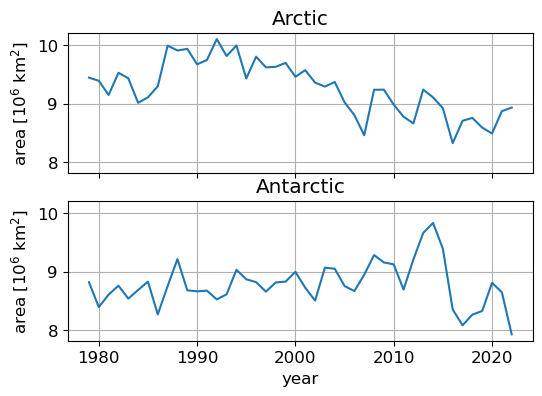

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, sharex=True)
ddict["north"]["area"].groupby("time.year").mean("time").plot(ax=ax1)
ddict["south"]["area"].groupby("time.year").mean("time").plot(ax=ax2)

ax1.grid()
ax2.grid()

ax1.set_ylabel("area [10$^6$ km$^2$]")
ax2.set_ylabel("area [10$^6$ km$^2$]")
ax1.set_xlabel("")

ax1.set_title("Arctic")
ax2.set_title("Antarctic")

Text(0.5, 1.0, 'Antarctic')

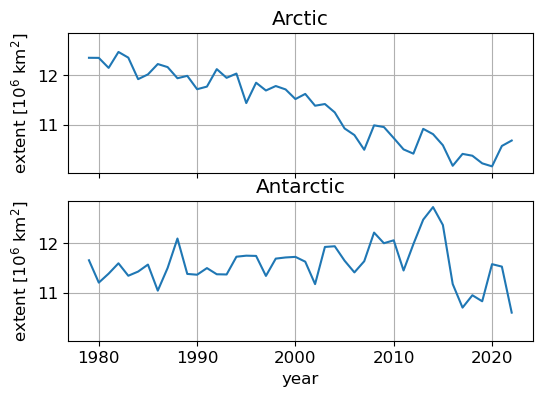

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, sharex=True)
ddict["north"]["extent"].groupby("time.year").mean("time").plot(ax=ax1)
ddict["south"]["extent"].groupby("time.year").mean("time").plot(ax=ax2)

ax1.grid()
ax2.grid()

ax1.set_ylabel("extent [10$^6$ km$^2$]")
ax2.set_ylabel("extent [10$^6$ km$^2$]")
ax1.set_xlabel("")

ax1.set_title("Arctic")
ax2.set_title("Antarctic")

In [20]:
def to_monthly(ds):
    year = ds.time.dt.year
    month = ds.time.dt.month

    # assign new coords
    ds = ds.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return ds.set_index(time=("year", "month")).unstack("time") 

In [37]:
test = to_monthly(ddict["north"]["extent"])

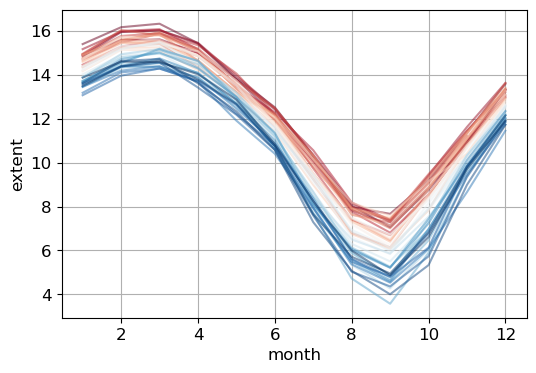

In [52]:

# create colormap
cm = plt.cm.RdBu(np.linspace(0, 1, test.year.size))
plt.gca().set_prop_cycle('color', list(cm))
test.plot(x="month", hue="year", add_legend=False, alpha=0.5)
plt.grid()


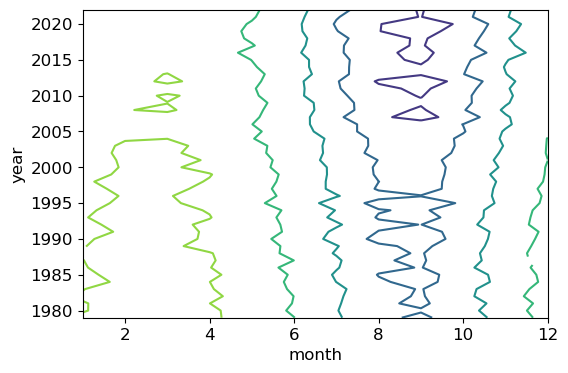

In [54]:
test.plot.contour(x="month")